In [2]:
# Linear Regression banglore housing
import pandas as pd

In [3]:
df=pd.read_csv('BangloreHousingPrices.csv')
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [4]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop(['size'],axis=1,inplace=True)
df

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [8]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(isfloat)].head()

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [9]:
def convert_sqft(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert_sqft)

In [65]:
df.head(31)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [10]:
df.corr()

C:\Users\Shreeyash\AppData\Local\Temp\ipykernel_7680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_sqft,bath,price,BHK
total_sqft,1.000000,0.392743,0.574330,0.346013
bath,0.392743,1.000000,0.456350,0.898408
price,0.574330,0.456350,1.000000,0.397222
BHK,0.346013,0.898408,0.397222,1.000000


In [11]:
import seaborn as sns

<Axes: xlabel='BHK'>

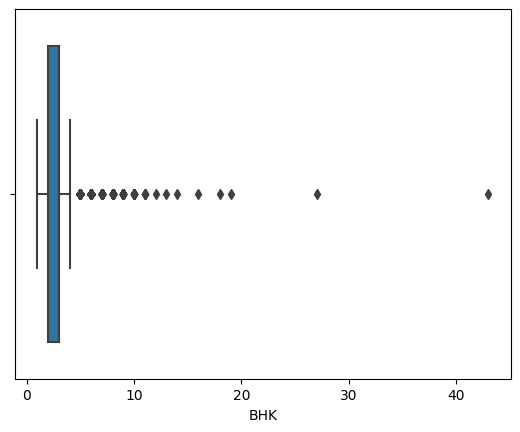

In [12]:
sns.boxplot(x=df['BHK'])

In [13]:
df.describe()

,total_sqft,bath,price,BHK
count,13200.000000,13246.000000,13246.000000,13246.000000
mean,1555.302783,2.692586,112.389392,2.801902
std,1237.323445,1.341506,149.076587,1.295758
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1672.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [14]:
df=df[(df['BHK']>=2) & (df['BHK']<=4)]

In [70]:
df.describe()

,total_sqft,bath,price,BHK
count,11725.000000,11754.000000,11754.000000,11754.000000
mean,1545.381360,2.552152,105.850557,2.648460
std,1076.154176,0.842913,126.923178,0.682177
min,1.000000,1.000000,10.000000,2.000000
25%,1126.000000,2.000000,50.000000,2.000000
50%,1300.000000,2.000000,70.000000,3.000000
75%,1664.000000,3.000000,112.000000,3.000000
max,52272.000000,8.000000,2912.000000,4.000000


In [15]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head(10)

C:\Users\Shreeyash\AppData\Local\Temp\ipykernel_7680\4183501681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft']=df['price']*100000/df['total_sqft']


,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889


In [72]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,11725.000000,11754.000000,11754.000000,11754.000000,1.172500e+04
mean,1545.381360,2.552152,105.850557,2.648460,7.431405e+03
std,1076.154176,0.842913,126.923178,0.682177,1.110442e+05
min,1.000000,1.000000,10.000000,2.000000,2.678298e+02
25%,1126.000000,2.000000,50.000000,2.000000,4.239216e+03
50%,1300.000000,2.000000,70.000000,3.000000,5.317073e+03
75%,1664.000000,3.000000,112.000000,3.000000,6.984127e+03
max,52272.000000,8.000000,2912.000000,4.000000,1.200000e+07


In [16]:
df=df[(df['price_per_sqft']>=4000) & (df['price_per_sqft']<=7000)]

In [74]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,6581.000000,6581.000000,6581.000000,6581.000000,6581.000000
mean,1437.414719,2.418174,76.996144,2.537456,5289.748643
std,688.687672,0.691370,44.580009,0.603689,824.575267
min,420.000000,1.000000,20.000000,2.000000,4000.000000
25%,1128.000000,2.000000,55.000000,2.000000,4594.594595
50%,1288.000000,2.000000,68.000000,2.000000,5200.000000
75%,1580.000000,3.000000,87.000000,3.000000,5932.896890
max,30000.000000,8.000000,2100.000000,4.000000,7000.000000


In [17]:
df.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft'], dtype='object')

In [18]:
x=df[['total_sqft', 'bath', 'price', 'BHK']]
y=df['price_per_sqft']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=51)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

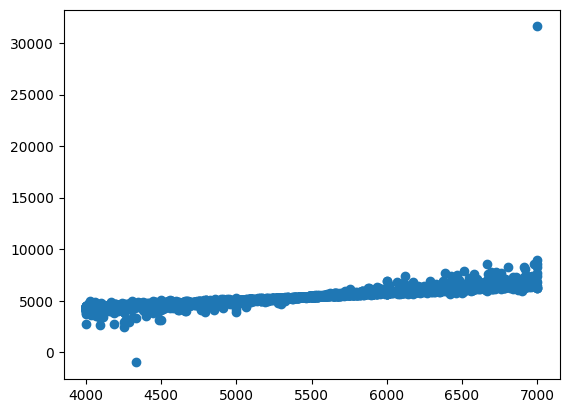

In [21]:
import matplotlib.pyplot as plt
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions)

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)

In [27]:
mse

314249.3504487972